In [1]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

Loading required package: behavr



In [2]:
data <- data.table::fread(file = "tidy_data_wide.csv")

In [3]:
experiments <- c("24hr LTM")
wild_types <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
data <- data[(experiment %in% experiments & Genotype %in% wild_types & Training == "6X_Spaced"),]
panel5_data <-data[region_id!="NONE",]

In [4]:
intervals <- c("NONE", "ZT05-ZT11", "ZT12-ZT18", "ZT05-ZT24")
panel5_data<-panel5_data[interval %in% intervals, ]
panel5_data[, interval := factor(interval, levels=intervals)]

In [5]:
A <- panel5_data[interval=="NONE",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
B <- panel5_data[interval=="ZT05-ZT11",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
C <- panel5_data[interval=="ZT12-ZT18",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
D <- panel5_data[interval=="ZT05-ZT24",.(Files, idoc_folder, ROI, User, Genotype, experiment, PRE, POST, SD_status, interval)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]
Dd <- D[, (delta = POST-PRE)]
X <- Cbind(Ad, Bd, Cd, Dd)
colnames(X) <- intervals
print(paste(
    nrow(A),
    nrow(B),
    nrow(C),
    nrow(D)  
))

[1] "29 12 22 5"


In [6]:
data.table::fwrite(x = A, file="prism/Fig5/Figure_5_NO_SD.csv")
data.table::fwrite(x = B, file="prism/Fig5/Figure_5_ZT05-ZT11.csv")
data.table::fwrite(x = C, file="prism/Fig5/Figure_5_ZT12-ZT18.csv")
data.table::fwrite(x = D, file="prism/Fig5/Figure_5_ZT05-ZT24.csv")
data.table::fwrite(x = X, file="prism/Fig5/Figure_5_boxplot.csv")

In [7]:
panel5_data_long <- melt(panel5_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [8]:
panel5_data_long[Genotype=="Iso31" & test == "POST", .N, by=interval]

interval,N
<fct>,<int>
NONE,29
ZT05-ZT24,5
ZT12-ZT18,22
ZT05-ZT11,12


[1] -1.00  0.75
[1] 0.55


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

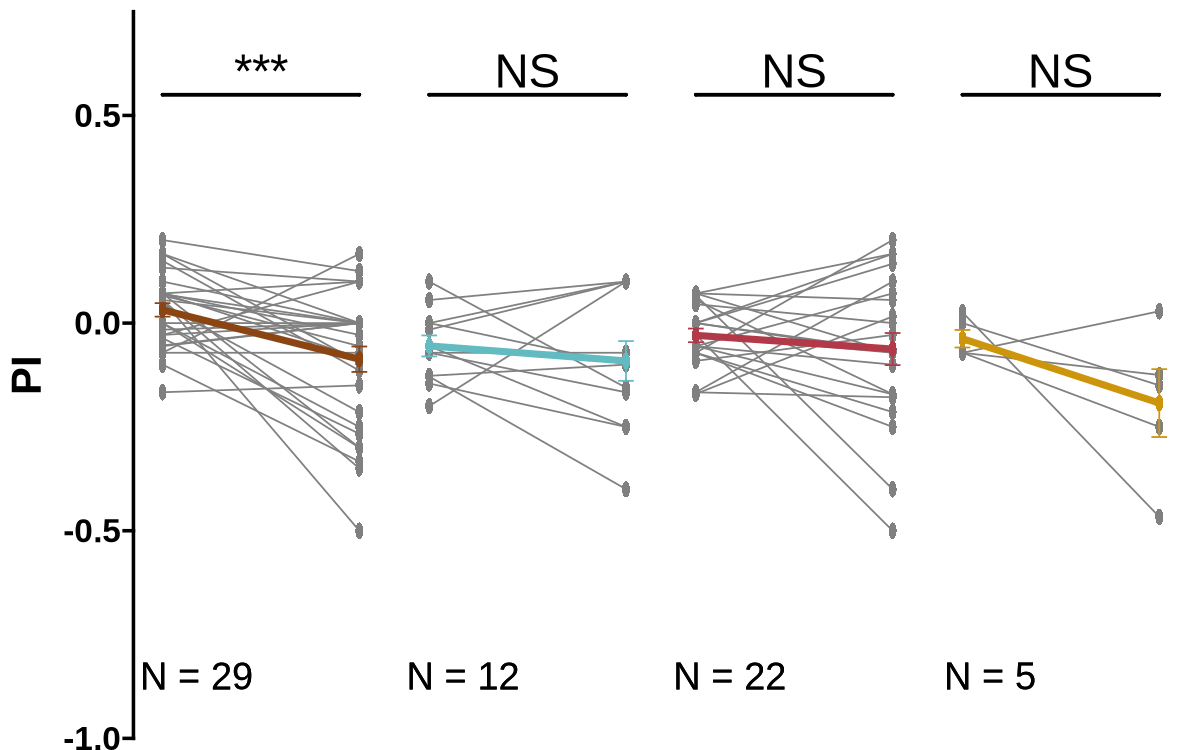

In [9]:
ratio=2.5
size_unit=2.5
panel5 <- learning_plot(
    panel5_data_long, "interval",
    map_signif_level=TRUE, test=paired_t_test,
    colors=colors_panel5[c(1,2,3, 4)], starsize=10,
    y_annotation=0.55, textsize=8,
    y_limits=c(-1, 0.75),
    hjust_text=0.2
)
options(repr.plot.width=size_unit*panel5$n_facets, repr.plot.height=size_unit*ratio)
panel5$gg
save_learning_plot(plot=panel5, filename = "prism/Fig5/panel5A.svg", ratio=ratio, size_unit = size_unit)

In [16]:
dcast(panel5$annotation, group__ ~ test, value.var="PI")[, .(group__, POST-PRE)]

group__,V2
<fct>,<dbl>
NONE,-0.11873185
ZT05-ZT11,-0.03613985
ZT12-ZT18,-0.03296583
ZT05-ZT24,-0.15491429


In [13]:
panel5$annotation

group__,y_position,annotations,stars,N,test,PI,PI_median,PI_std,std_error,x
<fct>,<dbl>,<chr>,<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NONE,0.5,< 0.001,***,29,PRE,0.03178659,0.05550000,0.08753374,0.01625461,1
NONE,0.5,< 0.001,***,29,POST,-0.08694527,-0.02857143,0.16453603,0.03055357,2
ZT05-ZT11,0.5,0.2347,NS,12,PRE,-0.05499772,-0.06349206,0.08749246,0.02525690,1
ZT05-ZT11,0.5,0.2347,NS,12,POST,-0.09113757,-0.10000000,0.16580511,0.04786381,2
ZT12-ZT18,0.5,0.2222,NS,22,PRE,-0.02957927,-0.02857143,0.07705833,0.01642889,1
ZT12-ZT18,0.5,0.2222,NS,22,POST,-0.06254509,-0.06904762,0.18100133,0.03858961,2
ZT05-ZT24,0.5,0.0935,NS,5,PRE,-0.03767143,-0.07142857,0.04716102,0.02109105,1
ZT05-ZT24,0.5,0.0935,NS,5,POST,-0.19258571,-0.15000000,0.18276849,0.08173656,2


Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
    id   group__         PRE       POST        dPI outlier
1: 568 ZT05-ZT24  0.07142857  0.2380952  0.1666667    TRUE
2: 585 ZT05-ZT24  0.02597403 -0.4666667 -0.4926407    TRUE
3: 600 ZT05-ZT11 -0.12878788 -0.4000000 -0.2712121    TRUE
4: 603 ZT05-ZT11 -0.20000000  0.1000000  0.3000000    TRUE
5: 632 ZT12-ZT18  0.00000000 -1.0000000 -1.0000000    TRUE
6: 643 ZT12-ZT18 -0.07142857  0.2000000  0.2714286    TRUE
7: 651      NONE -0.02857143  0.2500000  0.2785714    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


$gg

$n_facets
[1] 4


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

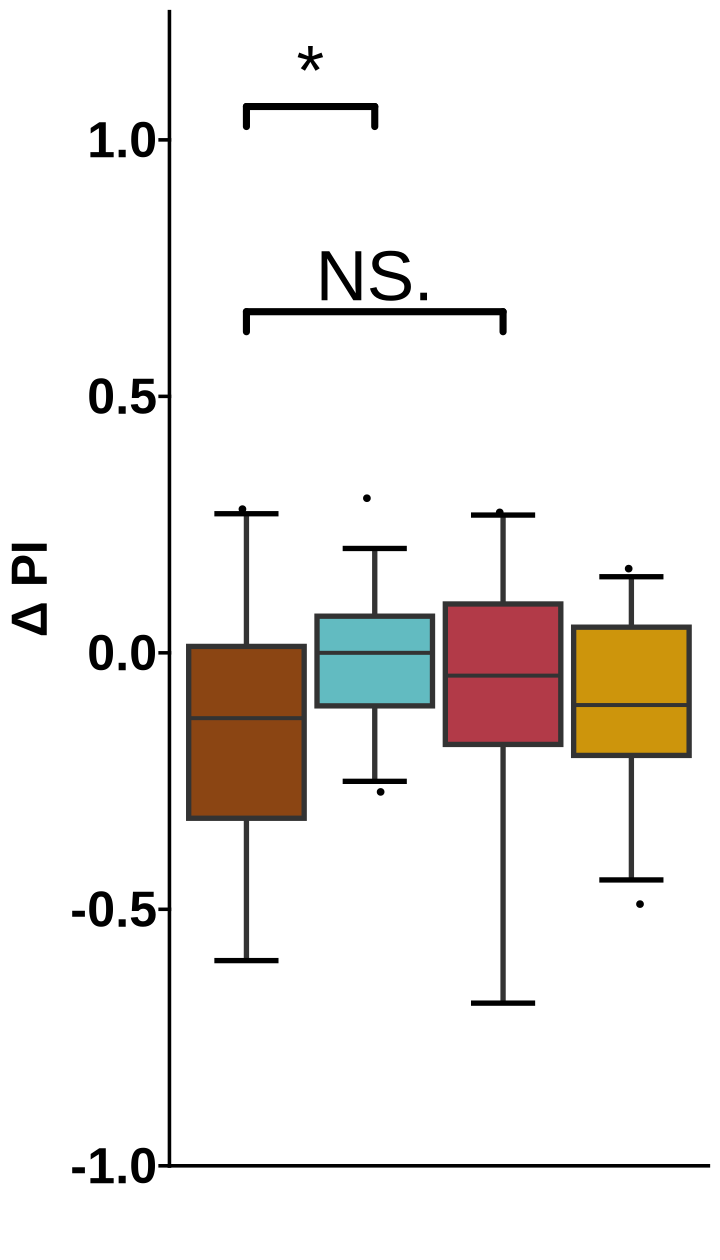

In [20]:
size_unit=1.5
ratio=7
panel5B <- summary_plot(
    data=panel5_data_long, "interval",
    comparisons=list(
        # c("ZT05-ZT11", "ZT12-ZT18"),
        # c("ZT12-ZT18", "No SD"),
        c("ZT05-ZT11", "NONE"),
        c("ZT12-ZT18", "NONE")
    ),
    annotation_y=c(1, 0.6),
    test=unpaired_t_test,
    colors=colors_panel5[c(1,2,3,4)],
    y_limits=c(-1, 1.25),
    text_y_size=30,
    title_y_size=30,
    percentile=c(0.025, 0.975)
)

panel5B$gg <- panel5B$gg + theme(
    axis.ticks.x = element_blank(), axis.text.x = element_blank()
)
options(repr.plot.width=size_unit*panel5B$n_facets, repr.plot.height=size_unit*ratio)
panel5B
save_summ_plot(plot=panel5B, filename = "prism/Fig5/panel5B.svg", ratio=ratio, size_unit = size_unit)

In [21]:
getwd()

[1] "/media/vibflysleep/DATA2/IDOC/paper"

In [ ]:
options(repr.plot.width=15)
options(repr.plot.height=14)
gg <- cowplot::plot_grid(
    panel5$gg, panel5B$gg,
    ncol=2
)
ggsave(plot = gg, filename = "figures/Figure_5.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg